## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


## 1) Get familiar with data

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
ls ../../

 2018-04-27.txt   Desktop/             my_scripts/         Repos/
 2019-05-11.txt   DIRECTORY/           old/                Templates/
 20191019.txt     Documents/           one/                uniq_example.txt
 20191025.txt     Downloads/           Pictures/          'Untitled Folder'/
 2019_11_16.txt   DS_CL_files/         private_scripts/    Videos/
 2019-11-22.txt   example_unique.txt   Public/             vm-config-master/
 2019.11.23       first_dir/           python_class/
 anaconda3/       git/                 python_class_v16/
 Data/            Music/               python_class_v18/


In [4]:
s=pd.read_csv('./searches.csv.bz2', sep='^', nrows=10000)

In [5]:
s.shape

(10000, 45)

In [9]:
s.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [11]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

In [14]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
2991,2013-01-03,19:28:30,FFP,0537bda09139c4d8fad0035eb765a6ce,BR,BSB,FOR,0,1,BSB,FOR,2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
7255,2013-01-08,19:53:56,FCP,7d192994f213a3b0421042ba51fbc527,BR,IGU,GRU,0,1,IGU,GRU,2013-01-24,TT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
4922,2013-01-05,08:04:37,FCP,3565e31495ecfd46fa018339d20382b1,SA,TUU,JED,0,1,TUU,JED,2013-01-12,KP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
8487,2013-01-09,06:43:24,MPT,440642a9bdaeb6287f826cefd73255e8,US,LAX,SCL,1,2,LAX,SCL,2013-01-14,VK,NaN,SCL,LAX,2013-01-21,VK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
4692,2013-01-05,20:43:29,FXR,ef86fe6ba888450de247d3bce3a15dae,FR,CDG,EWR,1,4,CDG,ARN,2013-04-28,DU,C,ARN,EWR,2013-04-29,DU,A,EWR,OSL,2013-05-06,DU,A,OSL,CDG,2013-05-07,DU,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,a5d8a0904258d6b9436dff0397f62d73,PAR


In [17]:
s.describe(include='all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-01,22:00:28,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,BKK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,VR,J,AMS,TXL,2013-10-18,UV,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


## 2) Select the columns of interest

In [ ]:
Destination, Date

In [18]:
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=10000)

In [19]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


## 3) What to do with NaN

In [20]:
s=s.dropna()

In [22]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 234.4+ KB


## 4) Make action plan


In [ ]:
1) filtrar BCN, MAD, AGP
2) convertir dates to  month (as text)
3) group by airport, date
4) count 
5) plot

In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=10000)
s=s.dropna()

### 4.1) filter out the the searches for MAD, BCN, AGP
take only the rows having MAD, BCN or AGP as destination

In [43]:
s=s[ (s['Destination']=='MAD')|(s['Destination']=='BCN')|(s['Destination']=='AGP')]

In [52]:
s=s[  s['Destination'].isin(['MAD', 'BCN', 'AGP'])   ]

In [53]:
s.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [54]:
s['Year-month']=s['Date'].str[0:7]

In [55]:
s.head()

,Date,Destination,Year-month
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [57]:
#groupby of 2 columns on two columns
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=10000)
s=s.dropna()
s=s[  s['Destination'].isin(['MAD', 'BCN', 'AGP'])   ]
s['Date']=s['Date'].str[0:7]

In [58]:
s.head()

,Date,Destination
4,2013-01,MAD
93,2013-01,AGP
113,2013-01,BCN
147,2013-01,AGP
151,2013-01,MAD


In [59]:
s_gr=s.groupby(['Date', 'Destination']).count()
s_gr

In [66]:
s_gr=s.groupby(['Date', 'Destination'])['Destination'].count()
s_gr

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
Name: Destination, dtype: int64

In [ ]:
#Esto no tiene sentido pero funciona
s_gr=s.groupby(['Date', 'Destination'])['Destination'].count()


In [62]:
s_gr=s.groupby(['Date', 'Destination']).size()
s_gr

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
dtype: int64

In [73]:
#groupby of 3 columns on two columns
import pandas as pd
pd.set_option('display.max_columns', None)
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
s=s[  s['Destination'].isin(['MAD', 'BCN', 'AGP'])   ]
s['Year-Date']=s['Date'].str[0:7]
s_gr=s.groupby(['Year-Date', 'Destination']).count().reset_index()


In [79]:
s_gr=s_gr.rename(columns={'Date':'Count'})

In [81]:
plot_ready=s_gr.pivot('Year-Date', 'Destination', 'Count')

In [82]:
type(plot_ready)

pandas.core.frame.DataFrame

In [83]:
plot_ready

Destination,AGP,BCN,MAD
Year-Date,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


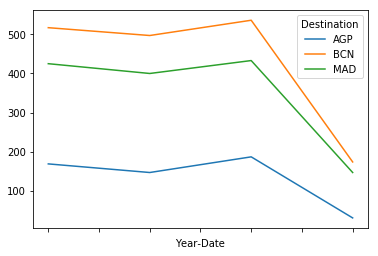

In [85]:
plot_ready.plot()

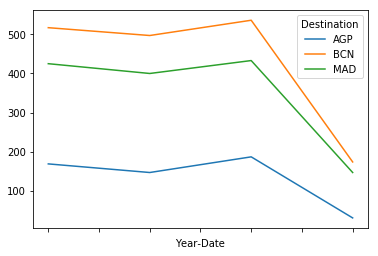

In [86]:
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000)
s=s.dropna()
s=s[  s['Destination'].isin(['MAD', 'BCN', 'AGP'])   ]
s['Year-Date']=s['Date'].str[0:7]
s_gr=s.groupby(['Year-Date', 'Destination']).count().reset_index()
s_gr=s_gr.rename(columns={'Date':'Count'})
plot_ready=s_gr.pivot('Year-Date', 'Destination', 'Count')
plot_ready.plot()

0 0
1 36
2 72
3 108
4 144
5 180
6 216
7 252
8 288
9 324
10 360
11 396
12 432
13 468
14 504
15 540
16 576
17 612
18 648
19 684
20 720
CPU times: user 4min 49s, sys: 2.79 s, total: 4min 51s
Wall time: 4min 49s


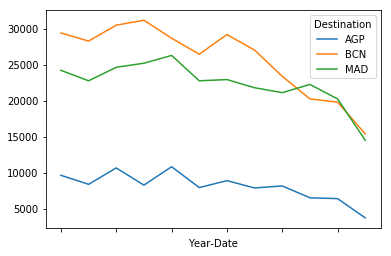

In [91]:
%%time
#CHUNKS
import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', None)

all_chunks=pd.DataFrame()

#si=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'],nrows=100000, chunksize=10000) 

si=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date','Destination'], chunksize=1000000, iterator=True) 

for i, s in enumerate(si):
    print(i, len (all_chunks))
    s=s.dropna()
    s=s[  s['Destination'].isin(['MAD', 'BCN', 'AGP'])   ]
    s['Year-Date']=s['Date'].str[0:7]
    s_gr=s.groupby(['Year-Date', 'Destination']).count().reset_index()
    all_chunks=all_chunks.append(s_gr)

    
all_gr=all_chunks.groupby(['Year-Date', 'Destination']).sum().reset_index()
all_gr=all_gr.rename(columns={'Date':'Count'})
plot_ready=all_gr.pivot('Year-Date', 'Destination', 'Count')
plot_ready.plot()


### 4.2) group by arr_port and month


### 4.2.1) Adding new column with YYYY-MM info

Options:
    1)transofming string to date:
        1a) parse_dates=['Date'] - in csv_read function
        1b) pd.to_datetime  - function
        
        1ab->     and creating new column with .month .year functions
    
    2) using string and obtainig yyyy-mm directly from it
   
    

### 4.2.1.1a transofming string to date with parse_dates:

### 4.2.1.1b transofming string to date with pandas to_datetime():

### 4.2.1.1 YYYY-MM
create new column from pandas timestamp data

### 4.2.1.2 using string and obtainig yyyy-mm directly from it

## 4.2 group by arr_port search month

What do we have?

## 4.3 Plotting

## 4.3.b Step by Step plotting

## 5) Adjust the code to work with Big data

### 5.1) chunksize & append group by DF

### How to find out which line has problems???